In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gmaps
from scipy.stats import linregress
# Google developer API key
from config import gkey
# Access maps with unique API key
gmaps.configure(api_key=gkey)

%matplotlib inline


In [2]:
# country codes conversion
country_csv = ("country_codes.csv")
country_df = pd.read_csv(country_csv)
country_df2 = country_df[["Alpha-2 code","Alpha-3 code"]].copy()
country_df3 = country_df2.rename(columns={'Alpha-3 code': 'NOC'}, inplace = False)
country_df3.head()

,Alpha-2 code,NOC
0,AF,AFG
1,AX,ALA
2,AL,ALB
3,DZ,DZA
4,AS,ASM


In [3]:
path = ("athlete_events.csv")
df_events = pd.read_csv(path)


#df_events["join_id"] = df_events["NOC"] + df_events["Year"].astype(str)
# summer_df = df_events[df_events['Season'] == 'Summer']
# summer_df["BMI"] = summer_df["Weight"]/((summer_df["Height"]/100)**2)
# Add numerical value for medals? 3 = gold, 2= silver, 1 bronze and no medal = 0
df_events_a = pd.merge(df_events, country_df3, on="NOC")
df_events_a['join_id'] = df_events_a["NOC"] + df_events_a["Year"].astype(str)
df_events_a.head(10)



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Alpha-2 code,join_id
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,CN,CHN1992
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,CN,CHN2012
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,CN,CHN2000
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,CN,CHN2004
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,CN,CHN2016
5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,CN,CHN2016
6,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Men's 500 metres,NaN,CN,CHN2006
7,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,CN,CHN2006
8,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver,CN,CHN1998
9,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",NaN,CN,CHN1998


In [4]:
path3 = ("country_lat_long.csv")
lat_long_df = pd.read_csv(path3)
lat_long_df2 = lat_long_df.rename(columns={'country': 'Alpha-2 code'})
lat_long_df2


,Alpha-2 code,latitude,longitude,name,NOC
0,AD,42.546245,1.601554,Andorra,AND
1,AE,23.424076,53.847818,United Arab Emirates,ARE
2,AF,33.939110,67.709953,Afghanistan,AFG
3,AG,17.060816,-61.796428,Antigua and Barbuda,ATG
4,AI,18.220554,-63.068615,Anguilla,AIA
...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,YEM
241,YT,-12.827500,45.166244,Mayotte,MYT
242,ZA,-30.559482,22.937506,South Africa,ZAF
243,ZM,-13.133897,27.849332,Zambia,ZMB


In [5]:
# lat_long_df2['join_id'] =  lat_long_df2["Alpha-2 code"] + lat_long_df2["Year"].astype(str)
df_events_b = pd.merge(df_events_a, lat_long_df2, on="Alpha-2 code")
df_events_b.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC_x,Games,Year,...,City,Sport,Event,Medal,Alpha-2 code,join_id,latitude,longitude,name,NOC_y
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men's Basketball,NaN,CN,CHN1992,35.86166,104.195397,China,CHN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,London,Judo,Judo Men's Extra-Lightweight,NaN,CN,CHN2012,35.86166,104.195397,China,CHN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,...,Sydney,Boxing,Boxing Men's Middleweight,NaN,CN,CHN2000,35.86166,104.195397,China,CHN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,...,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,CN,CHN2004,35.86166,104.195397,China,CHN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,CN,CHN2016,35.86166,104.195397,China,CHN


In [6]:
# population
path4 = ("population_by_country.csv")
pop_df = pd.read_csv(path4)
pop_df['join_id'] =  pop_df["NOC"] + pop_df["Year"].astype(str)
pop_df

,NOC,Year,Population,join_id
0,AFG,1936,12000000.0,AFG1936
1,AFG,1948,7000000.0,AFG1948
2,AFG,1956,7000000.0,AFG1956
3,AFG,1960,8996967.0,AFG1960
4,AFG,1964,9744772.0,AFG1964
...,...,...,...,...
3300,ZIM,2004,NaN,ZIM2004
3301,ZIM,2008,NaN,ZIM2008
3302,ZIM,2012,NaN,ZIM2012
3303,ZIM,2014,NaN,ZIM2014


In [7]:
df_events_c = pd.merge(df_events_b, pop_df, on="join_id")
df_events_c


,ID,Name,Sex,Age,Height,Weight,Team,NOC_x,Games,Year_x,...,Medal,Alpha-2 code,join_id,latitude,longitude,name,NOC_y,NOC,Year_y,Population
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,CHN,1992,1.164970e+09
1,6848,Bai Chongguang,M,21.0,184.0,83.0,China,CHN,1992 Summer,1992,...,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,CHN,1992,1.164970e+09
2,6854,Bai Mei,F,17.0,166.0,46.0,China,CHN,1992 Summer,1992,...,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,CHN,1992,1.164970e+09
3,11225,Bi Zhong,M,23.0,188.0,110.0,China,CHN,1992 Summer,1992,...,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,CHN,1992,1.164970e+09
4,17295,Cai Yanshu,M,28.0,169.0,79.0,China,CHN,1992 Summer,1992,...,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,CHN,1992,1.164970e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196756,120439,Okilani Tinilau,M,19.0,NaN,NaN,Tuvalu,TUV,2008 Summer,2008,...,NaN,TV,TUV2008,-7.109535,177.649330,Tuvalu,TUV,TUV,2008,1.031500e+04
196757,66655,Tuau Lapua Lapua,M,21.0,140.0,62.0,Tuvalu,TUV,2012 Summer,2012,...,NaN,TV,TUV2012,-7.109535,177.649330,Tuvalu,TUV,TUV,2012,1.074400e+04
196758,74540,Asenate Manoa,F,20.0,NaN,46.0,Tuvalu,TUV,2012 Summer,2012,...,NaN,TV,TUV2012,-7.109535,177.649330,Tuvalu,TUV,TUV,2012,1.074400e+04
196759,86663,Tavevele Noa,M,20.0,176.0,74.0,Tuvalu,TUV,2012 Summer,2012,...,NaN,TV,TUV2012,-7.109535,177.649330,Tuvalu,TUV,TUV,2012,1.074400e+04


In [8]:
df_country_summ = df_events_b.groupby(["NOC_x","Season"]).size().reset_index(name="Count")
# df_country_summ = df_country_summ.loc[df_country_summ['Year'] >= 1924]
df_country_summ

,NOC_x,Season,Count
0,AFG,Summer,126
1,ALB,Summer,63
2,ALB,Winter,7
3,AND,Summer,53
4,AND,Winter,116
...,...,...,...
191,UZB,Winter,31
192,VEN,Summer,918
193,VEN,Winter,7
194,VNM,Summer,62


In [9]:
## Copy to main
df_country_sum2 = df_country_summ.pivot(index=['NOC_x'], columns='Season', values=['Count'])
df_country_sum2.replace(np.nan,0,inplace=True)
df_country_sum2.reset_index(inplace=True)
df_country_sum2.columns = [' '.join(col).strip() for col in df_country_sum2.columns.values]

df_country_sum2.head()

,NOC_x,Count Summer,Count Winter
0,AFG,126.0,0.0
1,ALB,63.0,7.0
2,AND,53.0,116.0
3,ANT,133.0,0.0
4,ARG,2913.0,384.0


In [10]:
## Add correction to main

conditions = [
    (df_country_sum2['Count Summer']> 0) & (df_country_sum2['Count Winter'] > 0),
    (df_country_sum2['Count Summer']> 0) & (df_country_sum2['Count Winter'] == 0),
    (df_country_sum2['Count Summer'] == 0) & (df_country_sum2['Count Winter'] > 0)]
choices = [2, 1, 3]

df_country_sum2['summer_winter'] = np.select(conditions, choices, default=0)

df_country_sum2.head()

,NOC_x,Count Summer,Count Winter,summer_winter
0,AFG,126.0,0.0,1
1,ALB,63.0,7.0,2
2,AND,53.0,116.0,2
3,ANT,133.0,0.0,1
4,ARG,2913.0,384.0,2


In [11]:
## Add correction to main

df_events_d = pd.merge(df_events_b, df_country_sum2, on=["NOC_x"])
df_events_d = df_events_d.loc[df_events_d['Year'] >= 1924]

df_events_d.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC_x,Games,Year,...,Medal,Alpha-2 code,join_id,latitude,longitude,name,NOC_y,Count Summer,Count Winter,summer_winter
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,NaN,CN,CHN1992,35.86166,104.195397,China,CHN,4323.0,818.0,2
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,NaN,CN,CHN2012,35.86166,104.195397,China,CHN,4323.0,818.0,2
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,...,NaN,CN,CHN2000,35.86166,104.195397,China,CHN,4323.0,818.0,2
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,...,NaN,CN,CHN2004,35.86166,104.195397,China,CHN,4323.0,818.0,2
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,...,NaN,CN,CHN2016,35.86166,104.195397,China,CHN,4323.0,818.0,2


In [13]:
conditions_gld = [
    (df_events_d['Medal']== "Gold"),
    (df_events_d['Medal']!= "Gold")]
choices_gld = [1, 0]
df_events_d['gold'] = np.select(conditions_gld, choices_gld, default=0)

conditions_slv = [
    (df_events_d['Medal']== "Silver"),
    (df_events_d['Medal']!= "Silver")]
choices_slv = [1, 0]
df_events_d['silver'] = np.select(conditions_slv, choices_slv, default=0)

conditions_brz = [
    (df_events_d['Medal']== "Bronze"),
    (df_events_d['Medal']!= "Bronze")]
choices_brz = [1, 0]

df_events_d['bronze'] = np.select(conditions_brz, choices_brz, default=0)
df_events_e = df_events_d.loc[df_events_d['summer_winter'] == 2]
df_events_e

,ID,Name,Sex,Age,Height,Weight,Team,NOC_x,Games,Year,...,latitude,longitude,name,NOC_y,Count Summer,Count Winter,summer_winter,gold,silver,bronze
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,35.861660,104.195397,China,CHN,4323.0,818.0,2,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,35.861660,104.195397,China,CHN,4323.0,818.0,2,0,0,0
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,...,35.861660,104.195397,China,CHN,4323.0,818.0,2,0,0,0
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,...,35.861660,104.195397,China,CHN,4323.0,818.0,2,0,0,0
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,...,35.861660,104.195397,China,CHN,4323.0,818.0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196610,110652,Isaac Mandla Simelane,M,24.0,165.0,50.0,Swaziland,SWZ,1992 Summer,1992,...,-26.522503,31.465866,Swaziland,SWZ,64.0,3.0,2,0,0,0
196611,110652,Isaac Mandla Simelane,M,28.0,165.0,50.0,Swaziland,SWZ,1996 Summer,1996,...,-26.522503,31.465866,Swaziland,SWZ,64.0,3.0,2,0,0,0
196612,110653,Musa Simelane,M,26.0,180.0,57.0,Swaziland,SWZ,2000 Summer,2000,...,-26.522503,31.465866,Swaziland,SWZ,64.0,3.0,2,0,0,0
196613,115173,Robinson David Stewart,M,20.0,185.0,70.0,Swaziland,SWZ,1992 Summer,1992,...,-26.522503,31.465866,Swaziland,SWZ,64.0,3.0,2,0,0,0


In [14]:
# grpoupby for events
df_events_f = df_events_e.groupby(['Year','NOC_x', 'Event'], as_index=False).agg({'Name':'nunique','gold': 'max','silver': 'max','bronze': 'max'})

df_events_f

,Year,NOC_x,Event,Name,gold,silver,bronze
0,1924,ARG,Athletics Men's 100 metres,3,0,0,0
1,1924,ARG,Athletics Men's 110 metres Hurdles,1,0,0,0
2,1924,ARG,Athletics Men's 200 metres,1,0,0,0
3,1924,ARG,Athletics Men's 4 x 100 metres Relay,4,0,0,0
4,1924,ARG,Athletics Men's 400 metres,4,0,0,0
...,...,...,...,...,...,...,...
73918,2016,VEN,"Wrestling Men's Super-Heavyweight, Greco-Roman",1,0,0,0
73919,2016,VEN,"Wrestling Men's Welterweight, Greco-Roman",1,0,0,0
73920,2016,VEN,"Wrestling Women's Featherweight, Freestyle",1,0,0,0
73921,2016,VEN,"Wrestling Women's Heavyweight, Freestyle",1,0,0,0


In [15]:
# country participation grouping
df_events_g = df_events_e.groupby(['Year','NOC_x', 'Season','latitude','longitude'], as_index=False).agg({'Name':'nunique'})
df_events_g = df_events_g.rename(columns={'NOC_x':'NOC'})
df_events_g


,Year,NOC,Season,latitude,longitude,Name
0,1924,ARG,Summer,-38.416097,-63.616672,77
1,1924,AUS,Summer,-25.274398,133.775136,36
2,1924,AUS,Winter,-25.274398,133.775136,1
3,1924,AUT,Summer,47.516231,14.550072,49
4,1924,AUT,Winter,47.516231,14.550072,4
...,...,...,...,...,...,...
1762,2016,TUR,Summer,38.963745,35.243322,100
1763,2016,UKR,Summer,48.379433,31.165580,204
1764,2016,USA,Summer,37.090240,-95.712891,555
1765,2016,UZB,Summer,41.377491,64.585262,70


In [16]:
df_events_h = df_events_g.pivot(index=['NOC', 'Year'], columns=['Season'], values=['Name'])

df_events_h.replace(np.nan,0,inplace=True)
df_events_h.reset_index(inplace=True)
df_events_h.columns = [' '.join(col).strip() for col in df_events_h.columns.values]

df_events_h.columns

Index(['NOC', 'Year', 'Name Summer', 'Name Winter'], dtype='object')

In [17]:
df_events_i = pd.merge(df_events_h, lat_long_df2, on="NOC")
df_events_i.head()

,NOC,Year,Name Summer,Name Winter,Alpha-2 code,latitude,longitude,name
0,ALB,1972,5.0,0.0,AL,41.153332,20.168331,Albania
1,ALB,1992,7.0,0.0,AL,41.153332,20.168331,Albania
2,ALB,1996,7.0,0.0,AL,41.153332,20.168331,Albania
3,ALB,2000,4.0,0.0,AL,41.153332,20.168331,Albania
4,ALB,2004,7.0,0.0,AL,41.153332,20.168331,Albania


In [18]:
df_events_j = df_events_i.groupby(['NOC', 'latitude','longitude'], as_index=False).agg({'Name Summer':'sum','Name Winter':'sum' })
df_events_j

,NOC,latitude,longitude,Name Summer,Name Winter
0,ALB,41.153332,20.168331,56.0,3.0
1,AND,42.546245,1.601554,52.0,46.0
2,ARG,-38.416097,-63.616672,2284.0,176.0
3,ARM,40.069099,45.038189,155.0,31.0
4,AUS,-25.274398,133.775136,5115.0,342.0
...,...,...,...,...,...
69,TUR,38.963745,35.243322,982.0,86.0
70,UKR,48.379433,31.165580,1377.0,300.0
71,USA,37.090240,-95.712891,9127.0,2490.0
72,UZB,41.377491,64.585262,389.0,27.0


In [19]:
df_events_j["pct_summer"] = (df_events_j["Name Summer"]/(df_events_j["Name Summer"]+df_events_j["Name Winter"]))
df_events_j

,NOC,latitude,longitude,Name Summer,Name Winter,pct_summer
0,ALB,41.153332,20.168331,56.0,3.0,0.949153
1,AND,42.546245,1.601554,52.0,46.0,0.530612
2,ARG,-38.416097,-63.616672,2284.0,176.0,0.928455
3,ARM,40.069099,45.038189,155.0,31.0,0.833333
4,AUS,-25.274398,133.775136,5115.0,342.0,0.937328
...,...,...,...,...,...,...
69,TUR,38.963745,35.243322,982.0,86.0,0.919476
70,UKR,48.379433,31.165580,1377.0,300.0,0.821109
71,USA,37.090240,-95.712891,9127.0,2490.0,0.785659
72,UZB,41.377491,64.585262,389.0,27.0,0.935096


In [20]:
df_events_k = df_events_j.loc[df_events_j['latitude'] >=0]
df_events_k.head()

,NOC,latitude,longitude,Name Summer,Name Winter,pct_summer
0,ALB,41.153332,20.168331,56.0,3.0,0.949153
1,AND,42.546245,1.601554,52.0,46.0,0.530612
3,ARM,40.069099,45.038189,155.0,31.0,0.833333
5,AUT,47.516231,14.550072,1851.0,1352.0,0.577896
6,AZE,40.143105,47.576927,242.0,15.0,0.941634


In [22]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = df_events_k['pct_summer'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
median = quartiles[0.5]
iqr = upperq-lowerq


print(f"The upper quartile of summer participation is: {upperq}")
print(f"The the median of summer participation is: {quartiles[0.5]} ")
print(f"The lower quartile of summer participation is: {lowerq}")

print(f"The interquartile range of summer participation is: {iqr}")

conditions_plt = [
    (df_events_k['pct_summer'] > upperq),
    (df_events_k['pct_summer']> median),
    (df_events_k['pct_summer']> lowerq),
    (df_events_k['pct_summer']<= lowerq)
]
choices_plt = [4,3,2,1]
df_events_k['color'] = np.select(conditions_plt, choices_plt, default=0)
print(df_events_k['pct_summer'].min())
df_events_k

The upper quartile of summer participation is: 0.9666666666666667
The the median of summer participation is: 0.9005964214711729 
The lower quartile of summer participation is: 0.7806582092296378
The interquartile range of summer participation is: 0.18600845743702887
0.35353535353535354


C:\Users\u00rxv9\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,NOC,latitude,longitude,Name Summer,Name Winter,pct_summer,color
0,ALB,41.153332,20.168331,56.0,3.0,0.949153,3
1,AND,42.546245,1.601554,52.0,46.0,0.530612,1
3,ARM,40.069099,45.038189,155.0,31.0,0.833333,2
5,AUT,47.516231,14.550072,1851.0,1352.0,0.577896,1
6,AZE,40.143105,47.576927,242.0,15.0,0.941634,3
...,...,...,...,...,...,...,...
69,TUR,38.963745,35.243322,982.0,86.0,0.919476,3
70,UKR,48.379433,31.165580,1377.0,300.0,0.821109,2
71,USA,37.090240,-95.712891,9127.0,2490.0,0.785659,2
72,UZB,41.377491,64.585262,389.0,27.0,0.935096,3


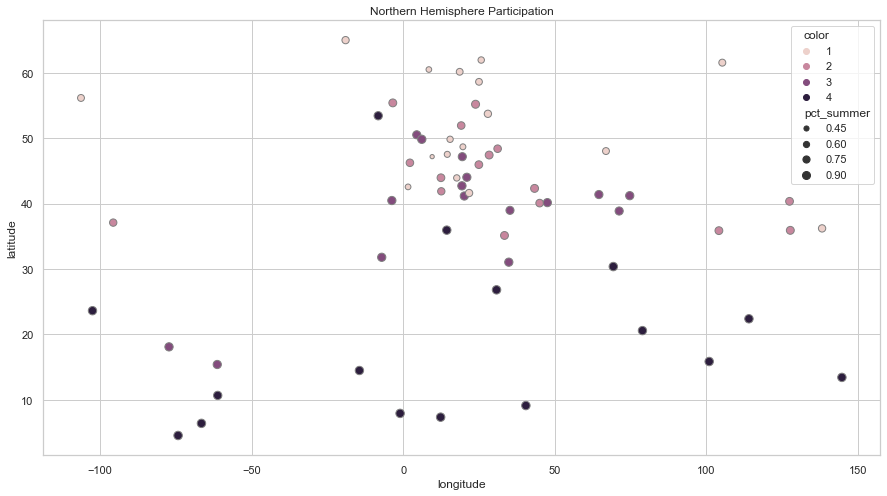

In [46]:
# use the scatterplot function to build the bubble map

sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")

sns.scatterplot(data=df_events_k, y="latitude", x="longitude", size="pct_summer", hue = "color", linewidth = 1, edgecolor="grey").set_title("Northern Hemisphere Participation")


# show the graph
plt.savefig('output/southern_output.png')
plt.show()

# Northern Hemisphere Participation
# Notes: The metric is the percent of their athletes that attent summer olympics. 
# The purpose of the metric is to show the degree that a country 

<AxesSubplot:title={'center':'Stacked Bar Graph'}, ylabel='NOC'>

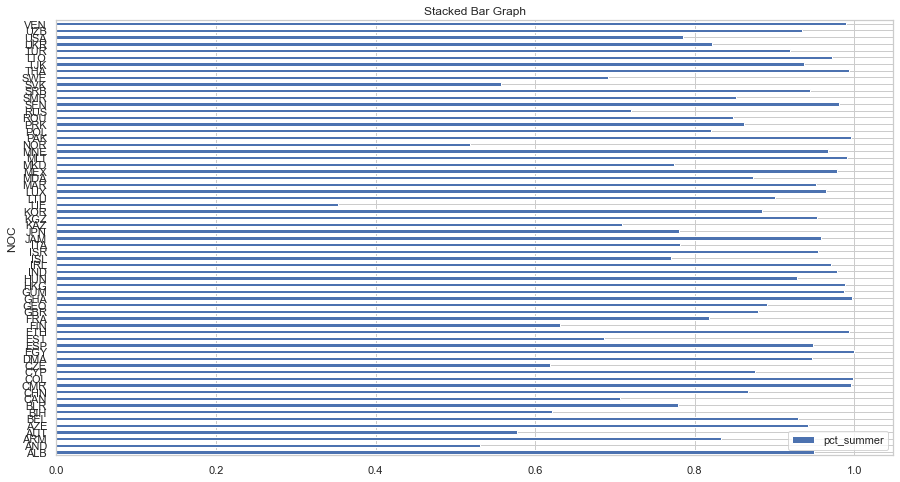

In [52]:
df_events_k1 = df_events_k[['NOC','pct_summer']]
# plot a Stacked Bar Chart using matplotlib
df_events_k1.plot(
    x = 'NOC',
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

The r-squared is: 0.36724855058139844 with p=8.831960794701255e-08


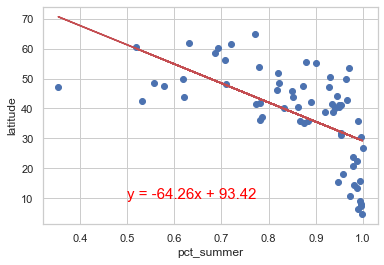

In [63]:
# Add the linear regression equation and line to plot
y_values = df_events_k['latitude']
x_values = df_events_k['pct_summer']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.5,10),fontsize=15,color="red")
plt.xlabel('pct_summer')
plt.ylabel('latitude')
print(f"The r-squared is: {rvalue**2} with p={pvalue}")
plt.show()

In [48]:
df_events_m = df_events_j.loc[df_events_j['latitude'] <0]
df_events_m.head()

,NOC,latitude,longitude,Name Summer,Name Winter,pct_summer
2,ARG,-38.416097,-63.616672,2284.0,176.0,0.928455
4,AUS,-25.274398,133.775136,5115.0,342.0,0.937328
10,BOL,-16.290154,-63.588653,97.0,18.0,0.843478
11,BRA,-14.235004,-51.925280,2962.0,46.0,0.984707
39,KEN,-0.023559,37.906193,695.0,3.0,0.995702


In [49]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = df_events_m['pct_summer'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
median = quartiles[0.5]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

conditions_plt = [
    (df_events_m['pct_summer'] > upperq),
    (df_events_m['pct_summer']> median),
    (df_events_m['pct_summer']> lowerq),
    (df_events_m['pct_summer']<= lowerq)
]
choices_plt = [4,3,2,1]
df_events_m['color'] = np.select(conditions_plt, choices_plt, default=0)

df_events_m

The lower quartile of temperatures is: 0.9284552845528455
The upper quartile of temperatures is: 0.9847074468085106
The interquartile range of temperatures is: 0.056252162255665095
The the median of temperatures is: 0.937328202308961 


C:\Users\rvern\anaconda3\envs\Bootcamp\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,NOC,latitude,longitude,Name Summer,Name Winter,pct_summer,color
2,ARG,-38.416097,-63.616672,2284.0,176.0,0.928455,1
4,AUS,-25.274398,133.775136,5115.0,342.0,0.937328,2
10,BOL,-16.290154,-63.588653,97.0,18.0,0.843478,1
11,BRA,-14.235004,-51.925280,2962.0,46.0,0.984707,3
39,KEN,-0.023559,37.906193,695.0,3.0,0.995702,4
52,NZL,-40.900557,174.885971,1727.0,116.0,0.937059,2
54,PER,-9.189967,-75.015152,434.0,6.0,0.986364,4
64,SWZ,-26.522503,31.465866,51.0,1.0,0.980769,3
67,TLS,-8.874217,125.727539,8.0,1.0,0.888889,1


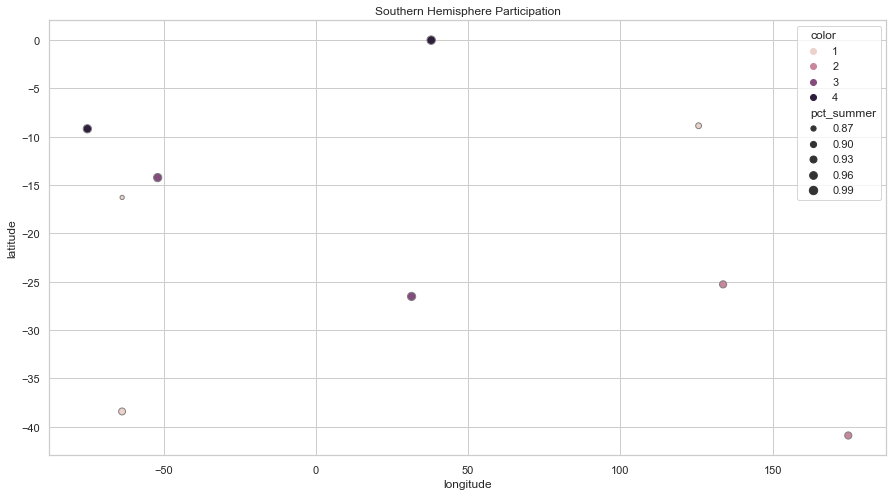

In [50]:
# use the scatterplot function to build the bubble map

sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")
sns.scatterplot(data=df_events_m, y="latitude", x="longitude", size="pct_summer", hue = "color", linewidth = 1, edgecolor="grey").set_title("Southern Hemisphere Participation")


# show the graph
plt.savefig('output/northern_output.png')
plt.show()

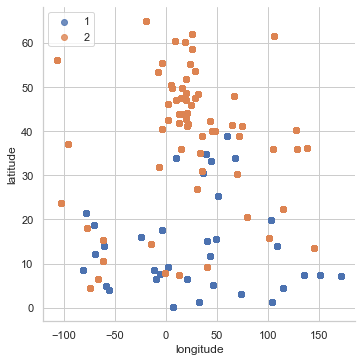

In [33]:
# subset for northern hemisphere
both_north = df_events_d[df_events_d["latitude"] >= 0]

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="longitude", y="latitude", data=both_north, fit_reg=False, hue='summer_winter', legend=False)
plt.legend(loc='upper left')
plt.show()

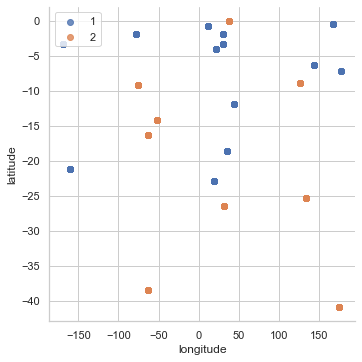

In [34]:
# subset for southern hemisphere
both_south = df_events_d[df_events_d["latitude"] < 0]

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="longitude", y="latitude", data=both_south, fit_reg=False, hue='summer_winter', legend=False)
plt.legend(loc='upper left')
plt.show()

In [35]:
# subset for northern hemisphere
summer_only = df_events_d[df_events_d["summer_winter"] == 1]
summer_only2 = summer_only[['latitude','longitude','Name']]

# Customize the size of the figure
figure_layout = {
    'width': '800px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

summer_only3 = summer_only2.groupby(['latitude','longitude']).agg({'Name': 'nunique'})
summer_only3

,,Name
latitude,longitude,
-22.957640,18.490410,40
-21.236736,-159.777671,30
-18.665695,35.529562,52
-11.875001,43.872219,15
-7.109535,177.649330,6
-6.314993,143.955550,61
-4.038333,21.758664,69
-3.373056,29.918886,25
-3.370417,-168.734039,9


In [36]:
# Assign the marker layer to a variable
markers = gmaps.marker_layer(summer_only2)
# Add the layer to the map
fig.add_layer(markers)
fig

ValueError: too many values to unpack (expected 3)